In [1]:
# Para manipulación de datos y operaciones numéricas
import numpy as np
# Para vectorización y modelos de Machine Learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
# Para evaluación
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Para visualización (opcional, para la matriz de confusión)
import matplotlib.pyplot as plt

print("Librerías principales importadas.")

Librerías principales importadas.


In [6]:
# 1. Datos de Ejemplo (Simples, para clasificación binaria: Positivo/Negativo)
textos_deporte = [
    "El partido de fútbol fue espectacular, ¡qué golazo!",  # Positivo
    "No me gustó nada el entrenamiento de hoy, muy aburrido.", # Negativo
    "La victoria del equipo de baloncesto fue emocionante.", # Positivo
    "Perdimos el partido de tenis, fue muy decepcionante.", # Negativo
    "Disfruté mucho la clase de natación, me relajó.",    # Positivo
    "El resultado del rugby fue terrible, jugaron muy mal." # Negativo
]
# Etiquetas: 1 para Positivo, 0 para Negativo
labels_deporte = np.array([1, 0, 1, 0, 1, 0])

# 2. Dividir datos en Entrenamiento y Prueba
X_train_deporte, X_test_deporte, y_train_deporte, y_test_deporte = train_test_split(
    textos_deporte, labels_deporte, test_size=0.5, random_state=42
) # Ajustamos test_size por el corpus pequeño

print(f"Textos de entrenamiento (Deporte): {len(X_train_deporte)}")
print(f"Textos de prueba (Deporte): {len(X_test_deporte)}")
print("-" * 30)


Textos de entrenamiento (Deporte): 3
Textos de prueba (Deporte): 3
------------------------------


In [3]:
# 3. Crear y Entrenar un Pipeline (TF-IDF + Regresión Logística)
# Esta vez usaremos Regresión Logística como clasificador para variar
pipeline_lr_deporte = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))), # Usamos unigramas y bigramas
    ('clf', LogisticRegression()) # Clasificador de Regresión Logística
])

print("\nEntrenando el Pipeline (TF-IDF + Regresión Logística)...")
# Entrenamos el pipeline COMPLETO con los datos de texto CRUDOS de entrenamiento
pipeline_lr_deporte.fit(X_train_deporte, y_train_deporte)
print("Entrenamiento completado.")
print("-" * 30)



Entrenando el Pipeline (TF-IDF + Regresión Logística)...
Entrenamiento completado.
------------------------------


In [4]:
# 4. Realizar Predicciones sobre los datos de Prueba
print("\nRealizando predicciones sobre el conjunto de prueba (Deporte)...")
y_pred_lr_deporte = pipeline_lr_deporte.predict(X_test_deporte)

print(f"Predicciones: {y_pred_lr_deporte}")
print(f"Etiquetas Reales: {y_test_deporte}")
print("-" * 30)



Realizando predicciones sobre el conjunto de prueba (Deporte)...
Predicciones: [1 1 1]
Etiquetas Reales: [1 0 0]
------------------------------



--- Evaluación del Modelo (Regresión Logística - Deporte) ---
              precision    recall  f1-score   support

Negativo (0)       0.00      0.00      0.00         2
Positivo (1)       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3


Matriz de Confusión (Deporte):


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


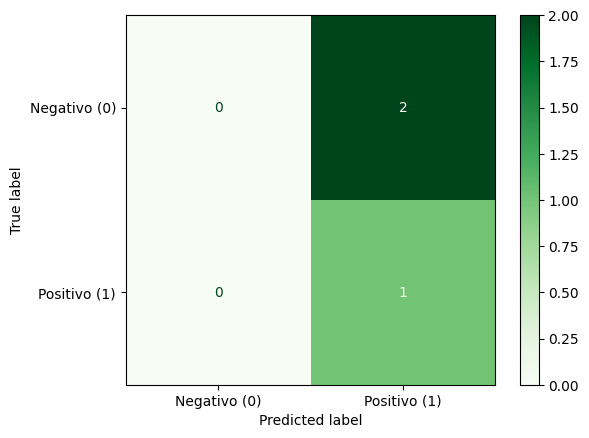

In [5]:
# 5. Evaluar el Modelo
print("\n--- Evaluación del Modelo (Regresión Logística - Deporte) ---")
print(classification_report(y_test_deporte, y_pred_lr_deporte, target_names=['Negativo (0)', 'Positivo (1)']))

# Matriz de Confusión
print("\nMatriz de Confusión (Deporte):")
cm_lr_deporte = confusion_matrix(y_test_deporte, y_pred_lr_deporte)
disp_lr_deporte = ConfusionMatrixDisplay(confusion_matrix=cm_lr_deporte, display_labels=['Negativo (0)', 'Positivo (1)'])
disp_lr_deporte.plot(cmap=plt.cm.Greens) # Cambiamos el color del mapa
plt.show() # Muestra el gráfico

1- Importando herramientas: Al principio, importa varias librerías de Python (numpy, sklearn, matplotlib). Estas son herramientas ayudan a manejar datos, construir modelos de Machine Learning y mostrar resultados.

2- Preparando datos: Crea una pequeña lista de frases sobre deportes (textos_deporte) y una lista de etiquetas (labels_deporte) que indican si cada frase es "Positiva" (1) o "Negativa" (0). Estos son los datos que usará para entrenar y probar el modelo.

3- Dividiendo datos: Divide estas frases y etiquetas en dos grupos: uno para "entrenamiento" (para que el modelo aprenda) y otro para "prueba" (para ver qué tan bien aprendió).

4- Creando un "Pipeline": Creamos un Pipeline. Pipeline es "una cadena de pasos". En este caso, la cadena tiene dos pasos:

**TfidfVectorizer**: Este paso convierte las palabras de las frases en números que el modelo pueda entender. También le dice al modelo qué tan importantes son ciertas palabras.
**LogisticRegression**: Este es el modelo de Machine Learning que aprende a clasificar las frases como positivas o negativas basándose en los números que le da el paso anterior.

5- Entrenando el modelo: Utiliza los datos de "entrenamiento" para que el Pipeline (ambos pasos juntos) aprenda a identificar patrones en las frases que corresponden a ser positivas o negativas.

6- Haciendo predicciones: Una vez entrenado, usa el Pipeline para hacer predicciones sobre las frases en el grupo de "prueba". Es decir, el modelo intenta adivinar si cada frase de prueba es positiva o negativa.

7- Evaluando el resultado: Finalmente, compara las predicciones del modelo con las etiquetas reales de las frases de prueba para ver qué tan preciso fue. Muestra un "reporte de clasificación" y una "matriz de confusión" que te dan detalles sobre el rendimiento del modelo.